In [1]:
# 한글폰트
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonte-nanum* -qq

import matplotlib.font_manager as fm
fm._rebuild()

# 한글 폰트 확인하기
for fontInfo in fm.fontManager.ttflist:
  if 'Nanum' in fontInfo.name:
    print(fontInfo.name + ' = '+fontInfo.fname)

plt.rc('font', family = 'NanumGothic')

# 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

E: Unable to locate package fonte-nanum*
E: Couldn't find any package by glob 'fonte-nanum*'
E: Couldn't find any package by regex 'fonte-nanum*'
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf


In [2]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 데이터 불러오기
train = pd.read_excel('/content/drive/MyDrive/빅콘테스트/2021 빅콘테스트_데이터분석분야_챔피언리그_수산Biz_문제데이터.xlsx')
val = pd.read_excel('/content/drive/MyDrive/빅콘테스트/2021 빅콘테스트_데이터분석분야_챔피언리그_수산Biz_자율평가데이터.xlsx')

In [4]:
train

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.920000
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.356352
3,2015-12-28,수산물,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.260870
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.791340
...,...,...,...,...,...,...,...,...,...,...
42068,2019-12-30,수산물,러시아,러시아,판매용,갑각류,게,왕게,활,38.437099
42069,2019-12-30,수산물,중국,중국,판매용,연체류 해물모듬,낙지,낙지,활,8.282274
42070,2019-12-30,수산물,러시아,러시아,판매용,갑각류,게,대게,활,23.396192
42071,2019-12-30,수산물,중국,중국,판매용,패류 멍게류,바지락,바지락,활,0.852967


In [5]:
train = train.rename(columns = {'REG_DATE':'기준일', 'P_TYPE':'제품구분','CTRY_1':'제조국','CTRY_2':'수출국',
                        'P_PURPOSE':'수입용도','CATEGORY_1':'중분류명 카테고리',
                        'CATEGORY_2':'어종','P_NAME':'상세어종','P_IMPORT_TYPE':'수입형태',
                        'P_PRICE':'target'})

val = val.rename(columns = {'REG_DATE':'기준일', 'P_TYPE':'제품구분','CTRY_1':'제조국','CTRY_2':'수출국',
                        'P_PURPOSE':'수입용도','CATEGORY_1':'중분류명 카테고리',
                        'CATEGORY_2':'어종','P_NAME':'상세어종','P_IMPORT_TYPE':'수입형태',
                        'P_PRICE':'target'})

In [6]:
# 연어만 가지고 온다.
train = train[train['상세어종'] == '연어']
val = val[val['상세어종'] == '연어']

In [7]:
# 이상치를 제거해 준다.
def get_outlier(df=None, column=None, weight=4.0):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

delete_index = get_outlier(df = train, column = 'target', weight = 4.5)

train.loc[delete_index,:]
# index를 찾아서 전부 nan값으로 변경해준다.
# for i in delete_index:
#   train.loc[i,'target'] = np.nan

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target
14240,2017-05-15,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",62.457202
14444,2017-05-22,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",49.777500
14639,2017-05-29,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",40.521693
14834,2017-06-05,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",51.394008
15054,2017-06-12,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",43.791678
15244,2017-06-19,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",48.550884
15449,2017-06-26,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",43.481666
15663,2017-07-03,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",50.173407
15859,2017-07-10,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",52.263797
16051,2017-07-17,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",47.185995


In [8]:
# month별로 값을 넣어주기 위해서 month변수를 생성한다.
train['month'] = train['기준일'].dt.month

# 자사제품제조용
for i in train.index:
  if i in delete_index:
    train.loc[i,'target'] = train[(train['month'] == train.loc[i,'month']) & (train['수입용도'] == train.loc[i,'수입용도']) & (train['제조국'] == '노르웨이')]['target'].mean()

Text(0.5, 0, '')

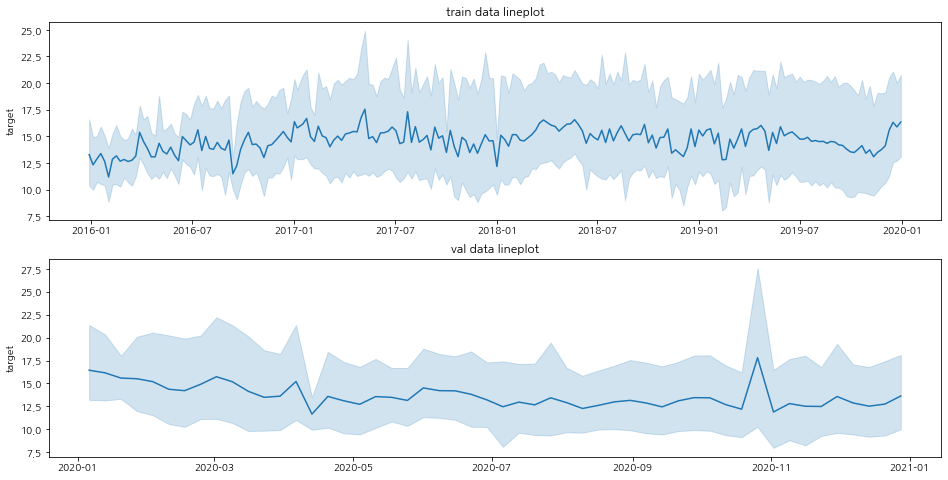

In [9]:
fig, ax = plt.subplots(nrows =2 , figsize = (16,8))

sns.lineplot(data = train, x = '기준일', y = 'target', ax = ax[0])
sns.lineplot(data = val, x = '기준일', y = 'target', ax = ax[1])
ax[0].set_title('train data lineplot')
ax[1].set_title('val data lineplot')

ax[0].set_xlabel('')
ax[1].set_xlabel('')

In [10]:
train.columns

Index(['기준일', '제품구분', '제조국', '수출국', '수입용도', '중분류명 카테고리', '어종', '상세어종', '수입형태',
       'target', 'month'],
      dtype='object')

In [11]:
# 사용하지 않는 column을 제거해준다.
train.drop(['제품구분','중분류명 카테고리','어종','상세어종'], axis = 1, inplace = True)
val.drop(['제품구분','중분류명 카테고리','어종','상세어종'], axis = 1, inplace = True)

# val 데이터 확인해보기

In [12]:
# val데이터 결측치 확인하기
val.isnull().sum()

기준일       0
제조국       0
수출국       0
수입용도      0
수입형태      0
target    0
dtype: int64

In [13]:
# val데이터에 train에서 볼 수 없던 데이터는 없는 것을 확인했다.
for i in val.columns[1:-1]:
  print(val[i].unique())

['영국' '노르웨이' '아이슬란드' '칠레' '캐나다' '미국' '호주']
['영국' '노르웨이' '아이슬란드' '칠레' '캐나다' '미국' '호주' '중국']
['판매용' '자사제품제조용' '외화획득용 제품']
['냉장' '냉장,포장횟감,필렛(F)' '냉장,필렛(F)' '냉장,필렛(F),횟감' '냉동,포장횟감,필렛(F)' '냉동'
 '냉동,필렛(F)']


## val EDA

Text(0.5, 0, '')

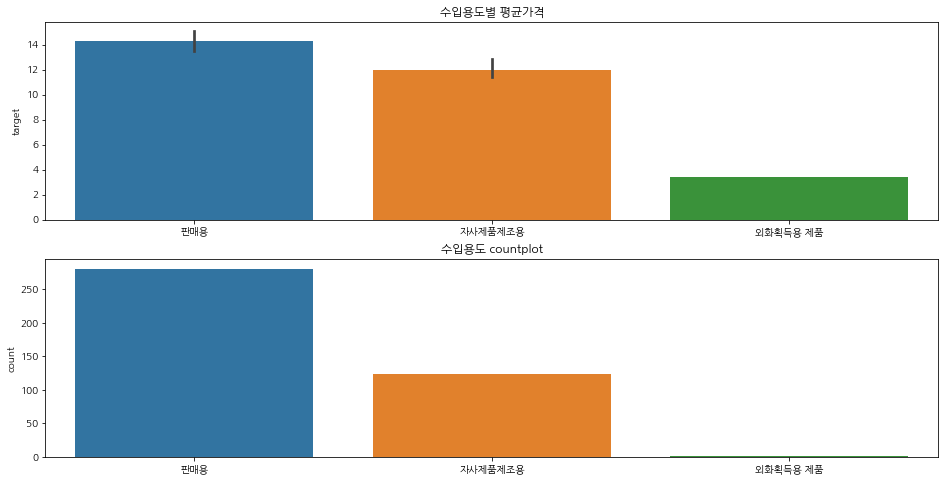

In [14]:
fig, ax = plt.subplots(nrows = 2, figsize = (16,8))
sns.barplot(data = val, x = '수입용도', y = 'target', ax = ax[0])
sns.countplot(val['수입용도'])
ax[0].set_title('수입용도별 평균가격')
ax[1].set_title('수입용도 countplot')
ax[0].set_xlabel('')
ax[1].set_xlabel('')

Text(0.5, 0, '')

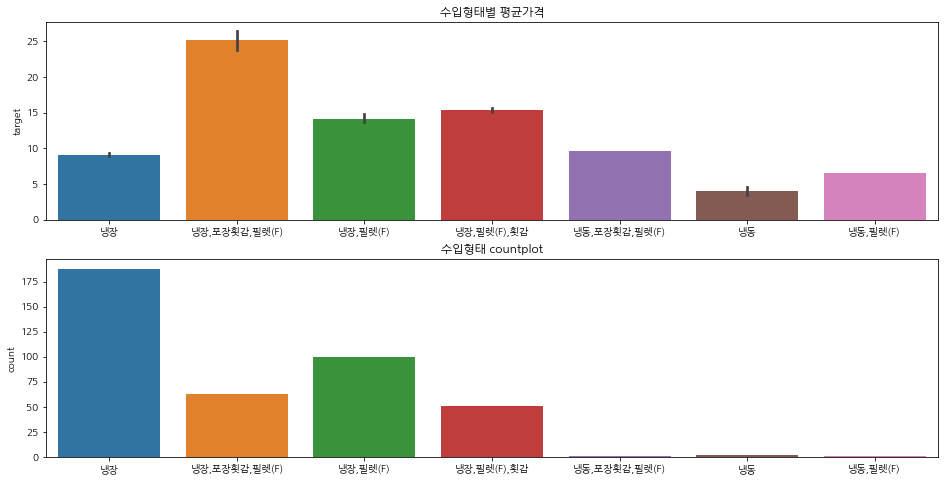

In [15]:
fig, ax = plt.subplots(nrows = 2, figsize = (16,8))
sns.barplot(data = val, x = '수입형태', y = 'target', ax = ax[0])
sns.countplot(val['수입형태'])
ax[0].set_title('수입형태별 평균가격')
ax[1].set_title('수입형태 countplot')
ax[0].set_xlabel('')
ax[1].set_xlabel('')

In [16]:
# val['difference'] = 0
# for i in val.index:
#   if val.loc[i, '제조국'] != val.loc[i,'수출국']:
#     val.loc[i,'difference'] = 1

In [17]:
# 다른게 하나밖에 없네?
# val['difference'].sum()

In [18]:
# 수출국과 제조국이 다른 부분은 차이가 없는 것 같다.
# val[val['difference'] == 1]

## 수입형태의 출현 빈도를 변수로 만들어 주자.

In [19]:
# def new_column(df = None):

#   연어_수입형태 = set()

#   for index in df.index:
#     value_list = df.loc[index, '수입형태'].split(',')
    
#     연어_수입형태.update(value_list)

#   # 고유한 수입형태에 모두 0 넣어주기
#   df[list(연어_수입형태)] = 0

#   for index in df.index:
#     value_list = df.loc[index, '수입형태'].split(',')
    
#     for value in value_list:
#       df.loc[index, value] = 1

#   return df

# train = new_column(df = train)
# val = new_column(df = val)

In [20]:
from datetime import timedelta

# 환율데이터
환율 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/AquaticAnimalsPrice/DataSets/환율데이터.csv')

# 환율['적용개싱일자'] = 환율['적용개시일자'].astype('str')
노르웨이_환율 = 환율[(환율['통화부호'] == 'NOK') & (환율['적용개시일자'] >= 20151227) & (환율['적용개시일자'] < 20210101)][['적용개시일자','환율']]
달러_환율 = 환율[(환율['국가부호'] =='US') &(환율['적용개시일자'] >= 20151227) & (환율['적용개시일자'] < 20210101)][['적용개시일자','환율']]

def split_time(data = None):
  data['적용개시일자'] = data['적용개시일자'].astype('str')
  data['month'] = data['적용개시일자'].apply(lambda x:x[:4])
  data['week'] = data['적용개시일자'].dt.week
  data.drop('적용개시일자', axis = 1, inplace = True)
  data['기준일'] = year + '-'+ month + '-' + day

  return data

# 데이터에 함수 적용시키기
노르웨이_환율 = split_time(노르웨이_환율)
달러_환율 = split_time(달러_환율)

# 데이터가 merge시키기 위해 +1 일을 해준다.
노르웨이_환율['기준일'] = pd.to_datetime(노르웨이_환율['기준일'], yearfirst=True) + timedelta(days = 1)
달러_환율['기준일'] = pd.to_datetime(달러_환율['기준일'], yearfirst = True) + timedelta(days = 1)

AttributeError: ignored

## Modeling

### Modeling(1)

In [ ]:
# train은 외화획득용 원료라고 되어있지만 val은 외화획득용 제품이라고 되어있으므로 이 부분을 변경시켜주도록 하자.
val['수입용도'] = val['수입용도'].apply(lambda x:x if x != '외화획득용 제품' else '외화획득용 원료')

In [ ]:
val['month'] = val['기준일'].dt.month

# 환율 데이터 넣어주기
# train['노르웨이_환율'] = 노르웨이_환율[:210]
# train['달러_환율'] = 달러_환율[:210]
# val['노르웨이_환율'] = 노르웨이_환율[210:]
# val['달러_환율'] = 달러_환율[210:]

def data_EDA(data = None, dummy = None, drop = None):

  final_data = data.copy()
  final_data['제조국'] = final_data['제조국'].apply(lambda x:x if x == '노르웨이' else '그 이외의 국가')
  final_data['수입형태'] = final_data['수입형태'].apply(lambda x:'냉동' if x[:2] == '냉동' else x)

  mapping = {'판매용':2, '자사제품제조용':1, '외화획득용 원료':0}
  final_data['수입용도'] = final_data['수입용도'].map(mapping)
  final_data = pd.get_dummies(data = final_data, columns = dummy, drop_first = True).drop(drop, axis = 1)
  final_data = pd.merge(final_data, 노르웨이_환율, how = 'left', on = '기준일')
  final_data = pd.merge(final_data, 달러_환율, how = 'left', on = '기준일')

  return final_data

final_train = data_EDA(data = train, dummy = ['제조국','수입형태'], drop = ['수출국','month'])
final_val = data_EDA(data = val, dummy = ['제조국','수입형태'], drop = ['수출국','month'])

In [ ]:
!pip install catboost

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_predict, KFold

def run_model(train_data = None, val_data = None):

  train_data = train_data.reset_index(drop = True)
  val_data = val_data.reset_index(drop = True)

  X_train, y_train = train_data.drop(['기준일','target'], axis = 1), train_data['target']
  X_test, y_test = val_data.drop(['기준일','target'], axis = 1), val_data['target']

  models = {'lightgbm':LGBMRegressor(random_state = 42), 'xgboost':XGBRegressor(random_state = 42),'catboost': CatBoostRegressor(random_state = 42, verbose = False),'lr': LinearRegression(),
            'ridge': Ridge(random_state = 42),'lasso': Lasso(),'rfg':RandomForestRegressor(),'gb':GradientBoostingRegressor()}


  final_y_pred = {}
  for i, j in models.items():
    model = j
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_pred = pd.Series(y_pred)

    validation_data = pd.concat([val_data[['기준일','target']],y_pred], axis = 1).rename(columns = {0 : 'y_pred'}).groupby('기준일').mean()

    final_y_pred[i] = validation_data

  for i, j in final_y_pred.items():
    print(f'***************************{i}의 그래프**************************')

    plt.figure(figsize = (16,8))
    sns.lineplot(data =j , x = '기준일', y = 'target')
    sns.lineplot(data =j, x = '기준일', y = 'y_pred')
    plt.legend(labels = ['target','y_pred'])
    plt.show()

    print(f'{i}의 RMSE :', mean_squared_error(j['target'], j['y_pred']) ** 0.5)

In [ ]:
run_model(train_data = final_train, val_data = final_val)

In [ ]:
!pip install vecstack

In [ ]:
models = [lgb,xgb, catboost, ridge, rfg,lr, gb, lasso]

S_train, S_test = stacking(models, X_train, y_train, X_test, regression = True, mode = 'oof_pred_bag', metric  = rmse, n_folds =3, random_state = 42)

lgb = LinearRegression()
lgb.fit(S_train, y_train)
y_pred = lgb.predict(S_test)
RMSE = mean_squared_error(y_test, y_pred) **0.5

print(RMSE)

### Modeling(2)

In [ ]:
# train에는 없지만 val에는 없는 column을 생성한다.
# val['슬라이스(S)'] = 0
# val['곤이'] = 0

In [ ]:
# train['제조국'] = train['제조국'].apply(lambda x:x if x == '노르웨이' else '그 이외의 국가')
# val['제조국'] = val['제조국'].apply(lambda x:x if x == '노르웨이' else '그 이외의 국가')

# train_수입형태 = train.groupby('기준일').sum()[['필렛(F)', '슬라이스(S)', '횟감', '포장횟감', '냉동', '곤이','냉장']].reset_index(drop = True)
# val_수입형태 = val.groupby('기준일').sum()[['필렛(F)', '슬라이스(S)', '횟감', '포장횟감', '냉동', '곤이','냉장']].reset_index(drop = True)


# final_train = pd.get_dummies(data = train, columns = ['제조국','수입용도'], drop_first= True).drop(['month','슬라이스(S)', '횟감','포장횟감', '냉장', '냉동', '곤이','필렛(F)','수출국'], axis = 1)
# final_val = pd.get_dummies(data = val, columns = ['제조국','수입용도'], drop_first= True).drop(['슬라이스(S)', '횟감','포장횟감', '냉장', '냉동', '곤이','필렛(F)','수출국'], axis = 1)

In [ ]:
# final_train = final_train.groupby('기준일').mean().reset_index()
# final_val = final_val.groupby('기준일').mean().reset_index()

In [ ]:
# final_train = pd.concat([final_train,train_수입형태], axis = 1)
# final_val = pd.concat([final_val, val_수입형태], axis = 1)

In [ ]:
# from sklearn.metrics import mean_squared_error
# from xgboost import XGBRegressor

# # train_test_split
# X_train, y_train = final_train.drop(['target','기준일'], axis = 1), final_train['target']
# X_test, y_test = final_val.drop(['기준일','target'], axis = 1), final_val['target']

# # Linear Regression
# model = XGBRegressor(random_state= 42)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# mean_squared_error(y_test, y_pred)

## Stacking ensemble

In [ ]:
# !pip install vecstack

In [ ]:
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from lightgbm import LGBMRegressor
# from xgboost import XGBRegressor
# from catboost import CatBoostRegressor
# from sklearn.metrics import mean_squared_error
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from vecstack import stacking

# def rmse(y, y_pred):

#   return np.sqrt(mean_squared_error(y, y_pred))
# lgb = LGBMRegressor(random_state =42)
# xgb = XGBRegressor(random_state = 42, tree_method = 'gpu_hist')
# catboost = CatBoostRegressor(random_state =42, task_type = 'GPU', verbose = False)
# rfg = RandomForestRegressor(random_state = 42)
# ridge = Ridge(random_state = 42)
# lr = LinearRegression()
# gb = GradientBoostingRegressor(random_state = 42)
# lasso = Lasso(random_state = 42)

# models = [lgb,xgb, catboost, ridge, rfg,lr, gb, lasso]

# S_train, S_test = stacking(models, X_train, y_train, X_test, regression = True, mode = 'oof_pred_bag', metric  = rmse, n_folds =3, random_state = 42)

# lgb = LinearRegression()
# lgb.fit(S_train, y_train)
# y_pred = lgb.predict(S_test)
# RMSE = mean_squared_error(y_test, y_pred) **0.5

# print(RMSE)

In [ ]:
# import statsmodels.api as sm

# X = sm.add_constant(X_train)
# y = y_train

# model = sm.OLS(y,X)
# results = model.fit()
# print(results.summary())